In [67]:
!pip install geopandas

     |████████████████████████████████| 972kB 5.8MB/s 
     |████████████████████████████████| 6.5MB 27.3MB/s 
     |████████████████████████████████| 14.8MB 308kB/s 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import plotly
import geopandas as gpd

## Manipulações primárias

  

In [3]:
data = pd.read_csv('/content/drive/My Drive/Bootcamp_ALURA/Portifolio-Alura/Desafios/Desafio_modulo_1/DataBase_COVID/caso.csv'  ,delimiter = ',', encoding = 'iso-8859-1')

In [81]:
data_new = pd.read_csv('/content/drive/My Drive/Bootcamp_ALURA/Portifolio-Alura/Desafios/Desafio_modulo_1/DataBase_COVID/caso_atualizado_22_11.csv'  ,delimiter = ',', encoding = 'iso-8859-1')

In [70]:
INFOS_UFS = gpd.read_file('/content/drive/My Drive/Bootcamp_ALURA/Portifolio-Alura/Desafios/Desafio_modulo_1/DataBase_COVID/bcim_2016_21_11_2018.gpkg', layer = 'lim_unidade_federacao_a')

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:422: RuntimeWarning:

Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.



  ### - Transformar o campo data em tipo Date


In [5]:
data['Data'] = pd.to_datetime(data['date'], format="%Y/%m/%d")
data['anomes'] = data['Data'].dt.strftime('%Y%m')

In [82]:
data_new['Data'] = pd.to_datetime(data_new['date'], format="%Y/%m/%d")
data_new['anomes'] = data_new['Data'].dt.strftime('%Y%m')

### - Adicionando um campo de região

In [6]:
d = {'RO': 'Norte','AC': 'Norte','AM': 'Norte','RR': 'Norte','PA': 'Norte'
    ,'AP': 'Norte','TO': 'Norte','MA': 'Nordeste','PI': 'Nordeste','CE': 'Nordeste'
    ,'RN': 'Nordeste','PA': 'Nordeste','PE': 'Nordeste','AL': 'Nordeste','SE': 'Nordeste'
    ,'BA': 'Nordeste','MG': 'Sudeste','ES': 'Sudeste','RJ': 'Sudeste','SP': 'Sudeste'
    ,'PA': 'Sul','SC': 'Sul','RS': 'Sul','MS': 'Centro-Oeste','MT': 'Centro-Oeste'
    ,'GO': 'Centro-Oeste','DF': 'Centro-Oeste'}

data['Regiao'] = data['state'].map(d)

In [83]:
d = {'RO': 'Norte','AC': 'Norte','AM': 'Norte','RR': 'Norte','PA': 'Norte'
    ,'AP': 'Norte','TO': 'Norte','MA': 'Nordeste','PI': 'Nordeste','CE': 'Nordeste'
    ,'RN': 'Nordeste','PA': 'Nordeste','PE': 'Nordeste','AL': 'Nordeste','SE': 'Nordeste'
    ,'BA': 'Nordeste','MG': 'Sudeste','ES': 'Sudeste','RJ': 'Sudeste','SP': 'Sudeste'
    ,'PA': 'Sul','SC': 'Sul','RS': 'Sul','MS': 'Centro-Oeste','MT': 'Centro-Oeste'
    ,'GO': 'Centro-Oeste','DF': 'Centro-Oeste'}

data_new['Regiao'] = data_new['state'].map(d)

In [84]:
data_new

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,Data,anomes,Regiao
0,2020-11-21,AP,NaN,state,56236,789,243,True,845731.0,861773.0,16.0,6525.61637,0.0140,2020-11-21,202011,Norte
1,2020-11-20,AP,NaN,state,56085,787,242,False,845731.0,861773.0,16.0,6508.09436,0.0140,2020-11-20,202011,Norte
2,2020-11-19,AP,NaN,state,55885,785,241,False,845731.0,861773.0,16.0,6484.88639,0.0140,2020-11-19,202011,Norte
3,2020-11-18,AP,NaN,state,55652,783,240,False,845731.0,861773.0,16.0,6457.84911,0.0141,2020-11-18,202011,Norte
4,2020-11-17,AP,NaN,state,55382,782,239,False,845731.0,861773.0,16.0,6426.51835,0.0141,2020-11-17,202011,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020399,2020-06-23,SP,Ãleo,city,1,0,5,False,2496.0,2471.0,3533809.0,40.46945,0.0000,2020-06-23,202006,Sudeste
1020400,2020-06-22,SP,Ãleo,city,1,0,4,False,2496.0,2471.0,3533809.0,40.46945,0.0000,2020-06-22,202006,Sudeste
1020401,2020-06-21,SP,Ãleo,city,1,0,3,False,2496.0,2471.0,3533809.0,40.46945,0.0000,2020-06-21,202006,Sudeste
1020402,2020-06-20,SP,Ãleo,city,1,0,2,False,2496.0,2471.0,3533809.0,40.46945,0.0000,2020-06-20,202006,Sudeste


In [8]:
data.dtypes

date                                      object
state                                     object
city                                      object
place_type                                object
confirmed                                  int64
deaths                                     int64
order_for_place                            int64
is_last                                     bool
estimated_population_2019                float64
estimated_population                     float64
city_ibge_code                           float64
confirmed_per_100k_inhabitants           float64
death_rate                               float64
Data                              datetime64[ns]
anomes                                    object
Regiao                                    object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936870 entries, 0 to 936869
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            936870 non-null  object        
 1   state                           936870 non-null  object        
 2   city                            930535 non-null  object        
 3   place_type                      936870 non-null  object        
 4   confirmed                       936870 non-null  int64         
 5   deaths                          936870 non-null  int64         
 6   order_for_place                 936870 non-null  int64         
 7   is_last                         936870 non-null  bool          
 8   estimated_population_2019       933215 non-null  float64       
 9   estimated_population            933215 non-null  float64       
 10  city_ibge_code                  933215 non-null  float64

In [10]:
data[data['place_type']=='state']

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,Data,anomes,Regiao
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223,2020-11-05,202011,Norte
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223,2020-11-04,202011,Norte
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224,2020-11-03,202011,Norte
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224,2020-11-02,202011,Norte
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224,2020-11-01,202011,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936865,2020-06-23,SP,Ãleo,city,1,0,5,False,2496.0,2471.0,3533809.0,40.46945,0.0000,2020-06-23,202006,Sudeste
936866,2020-06-22,SP,Ãleo,city,1,0,4,False,2496.0,2471.0,3533809.0,40.46945,0.0000,2020-06-22,202006,Sudeste
936867,2020-06-21,SP,Ãleo,city,1,0,3,False,2496.0,2471.0,3533809.0,40.46945,0.0000,2020-06-21,202006,Sudeste
936868,2020-06-20,SP,Ãleo,city,1,0,2,False,2496.0,2471.0,3533809.0,40.46945,0.0000,2020-06-20,202006,Sudeste


In [40]:
DF_Estados = data[data['place_type']=='state']

In [85]:
DF_Estados_new =   data_new[data_new['place_type']=='state']

In [41]:
DF_Estados

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,Data,anomes,Regiao
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223,2020-11-05,202011,Norte
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223,2020-11-04,202011,Norte
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224,2020-11-03,202011,Norte
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224,2020-11-02,202011,Norte
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224,2020-11-01,202011,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822221,2020-02-29,SP,NaN,state,2,0,5,False,45919049.0,46289333.0,35.0,0.00432,0.0000,2020-02-29,202002,Sudeste
822222,2020-02-28,SP,NaN,state,2,0,4,False,45919049.0,46289333.0,35.0,0.00432,0.0000,2020-02-28,202002,Sudeste
822223,2020-02-27,SP,NaN,state,1,0,3,False,45919049.0,46289333.0,35.0,0.00216,0.0000,2020-02-27,202002,Sudeste
822224,2020-02-26,SP,NaN,state,1,0,2,False,45919049.0,46289333.0,35.0,0.00216,0.0000,2020-02-26,202002,Sudeste


### preparando para separar os valores

> Indented block



In [61]:
def Plot_Pivot(df,Pivot_index, Pivot_Column, Pivot_Value ,figSZ,Plot_YLabel,title   ):
  pivot_df =  df.pivot_table(index=Pivot_index, columns=Pivot_Column, values=Pivot_Value)
  ax = pivot_df.plot(xticks=pivot_df.index,figsize =figSZ)
  ylab = ax.set_ylabel(Plot_YLabel)
  xlab = ax.set_xlabel(Pivot_index)
  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
  plt.title(title)
  plt.show()

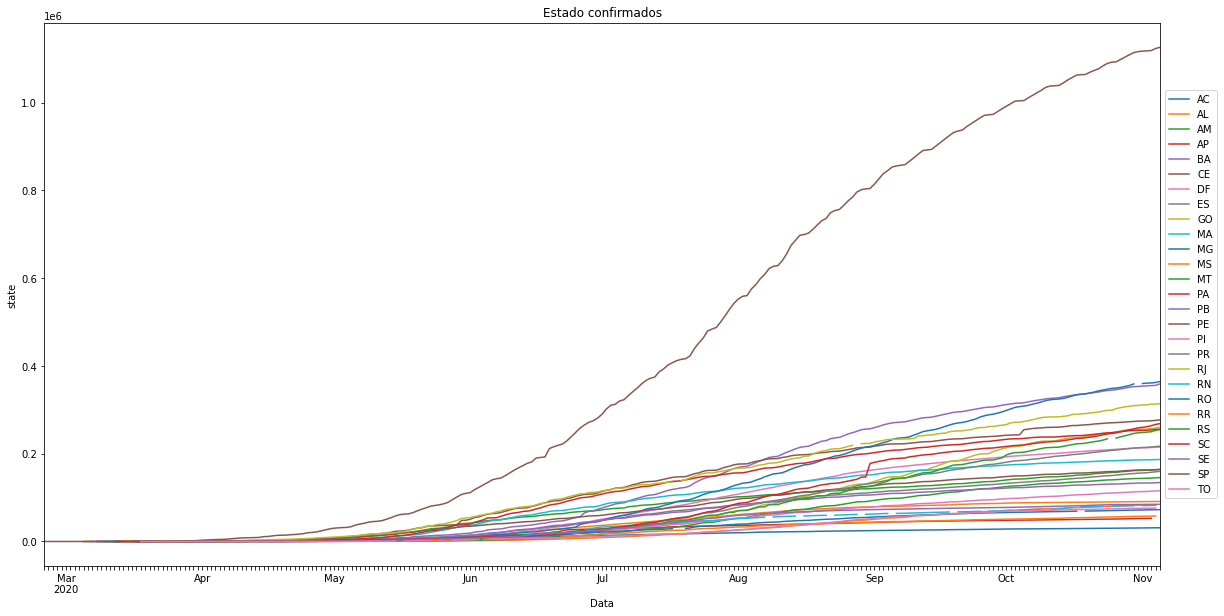

In [62]:
Plot_Pivot(DF_State,'Data', 'state', 'confirmed',(20, 10),'state',"Estado confirmados")

In [43]:
pivot_teste =  data.pivot_table(index='Data', columns='Regiao', values='confirmed_per_100k_inhabitants')


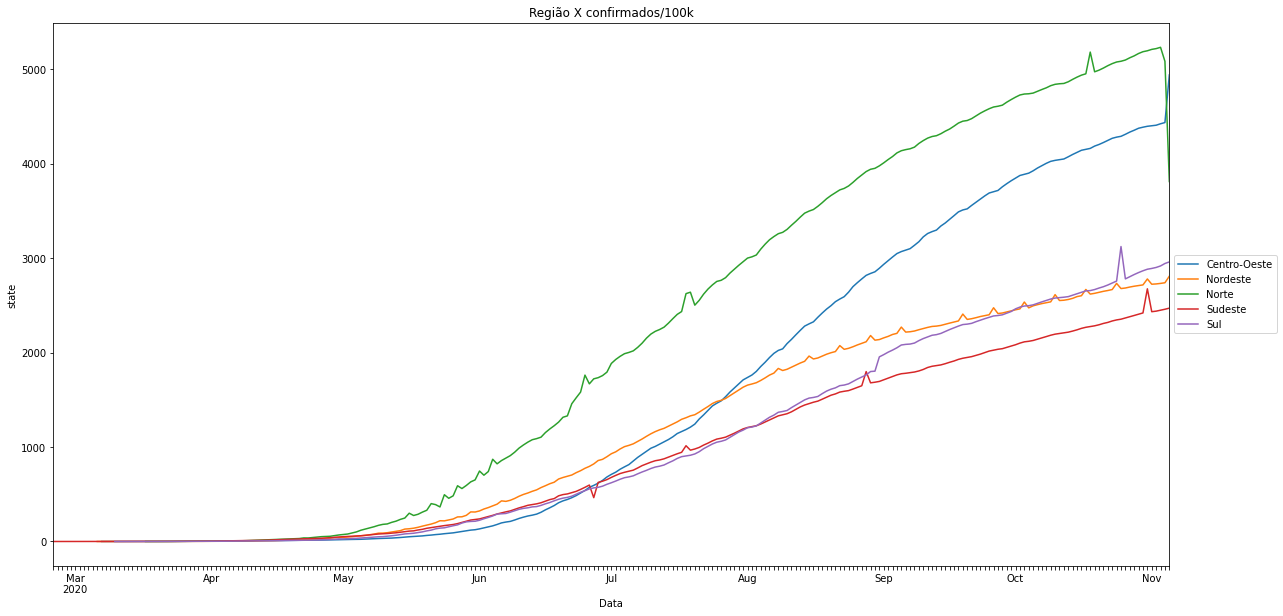

In [44]:
Plot_Pivot(DF_Estados,'Data', 'Regiao', 'confirmed_per_100k_inhabitants',(20, 10),'state',"Região X confirmados/100k")

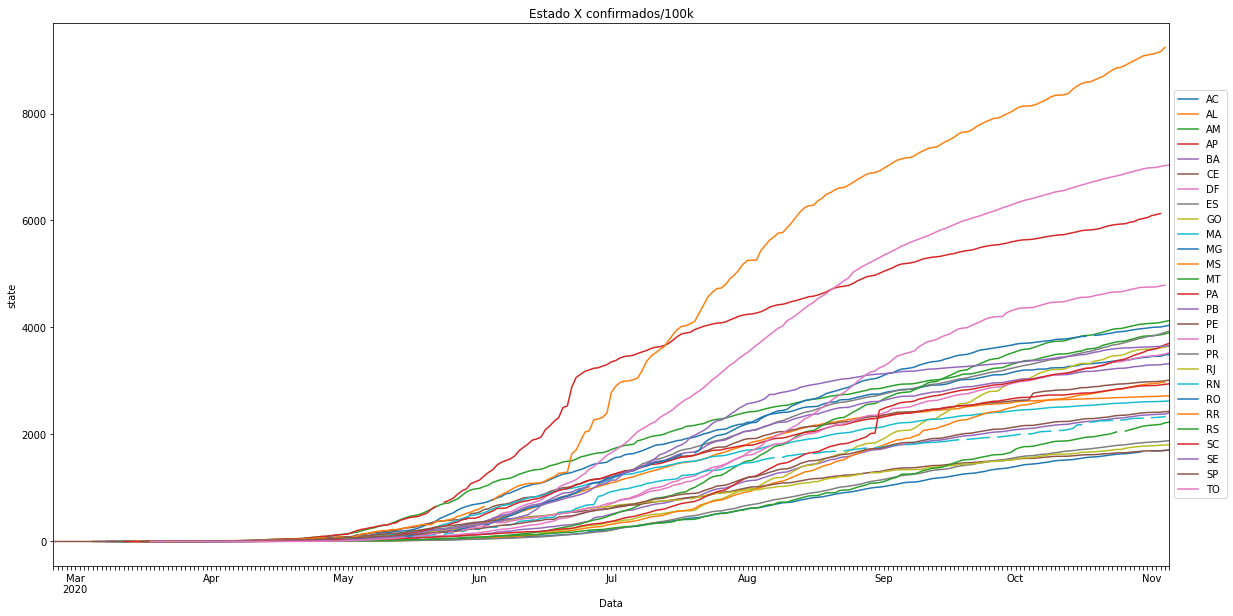

In [45]:
Plot_Pivot(DF_Estados,'Data', 'state', 'confirmed_per_100k_inhabitants',(20, 10),'state',"Estado X confirmados/100k")

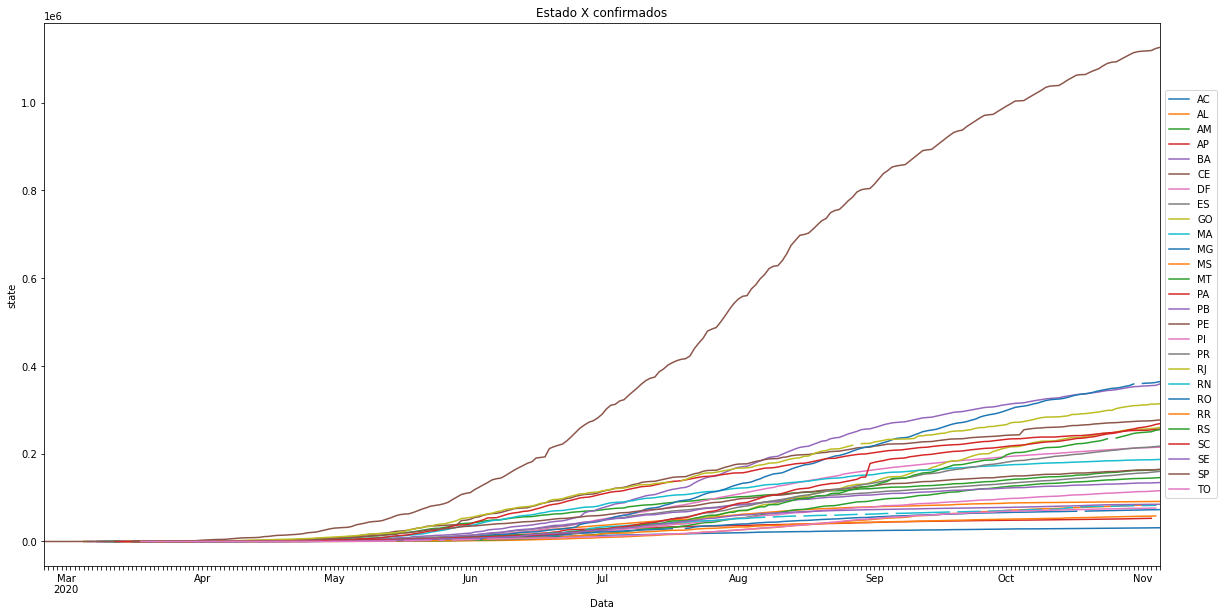

In [46]:
Plot_Pivot(DF_Estados,'Data', 'state', 'confirmed',(20, 10),'state',"Estado X confirmados")

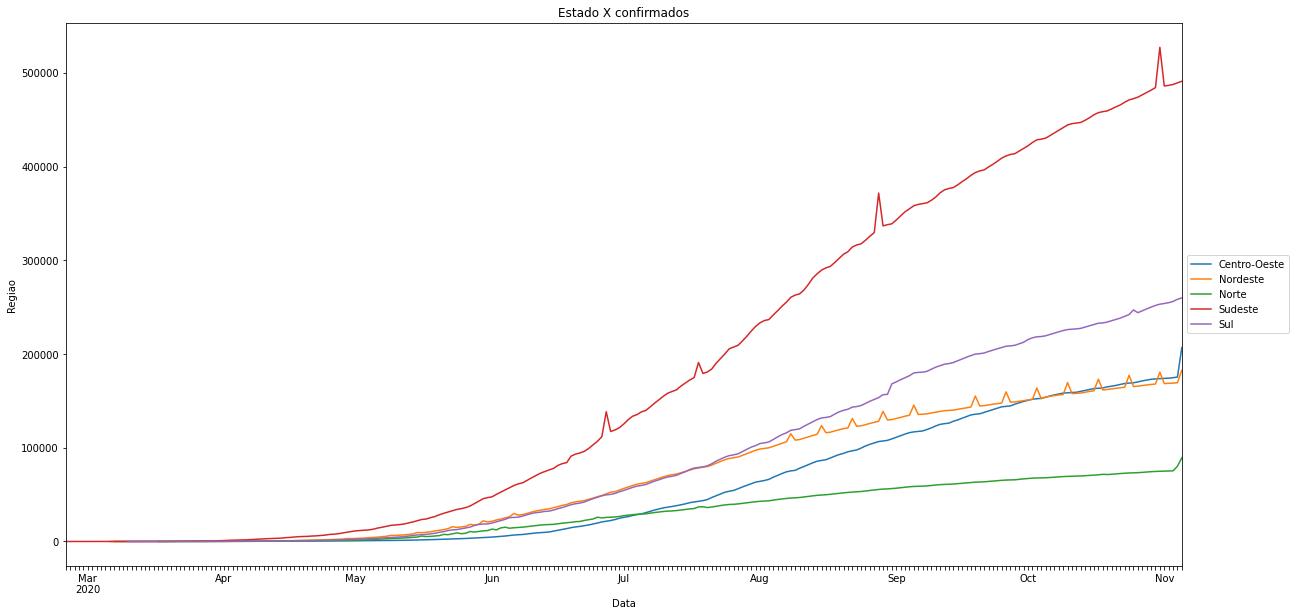

In [47]:
Plot_Pivot(DF_Estados,'Data', 'Regiao', 'confirmed',(20, 10),'Regiao',"Estado X confirmados")

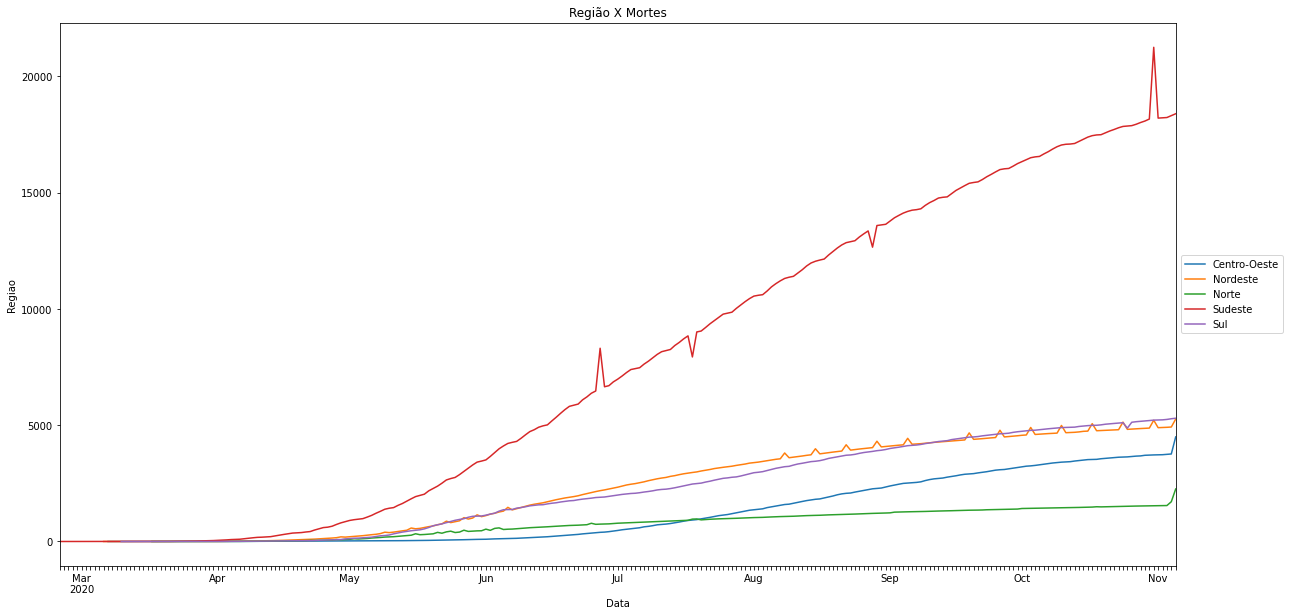

In [48]:
Plot_Pivot(DF_Estados,'Data', 'Regiao', 'deaths',(20, 10),'Regiao',"Região X Mortes")

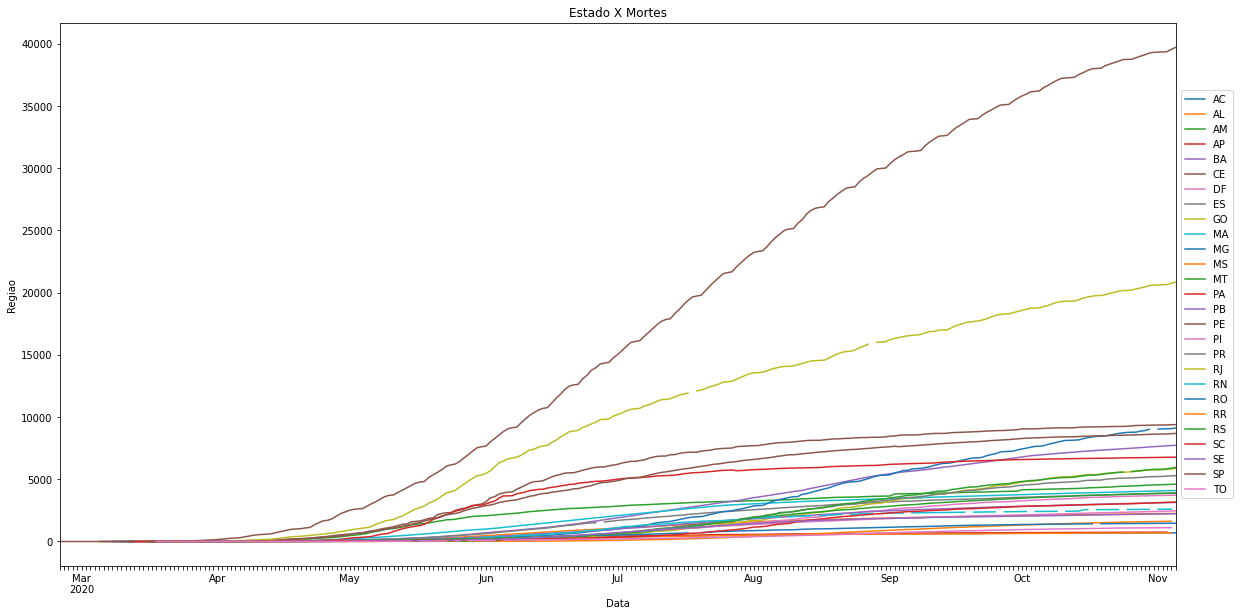

In [49]:
Plot_Pivot(DF_Estados,'Data', 'state', 'deaths',(20, 10),'Regiao',"Estado X Mortes")

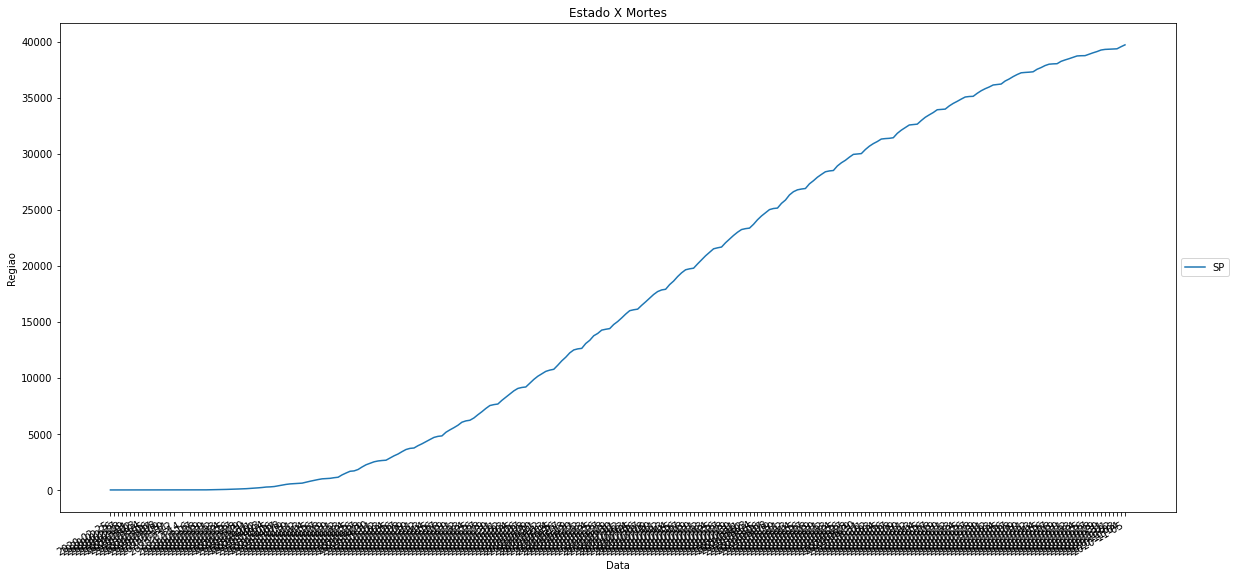

In [63]:
Plot_Pivot(DF_Estados[DF_Estados['state']=='SP'],'Data', 'state', 'deaths',(20, 10),'Regiao',"Estado X Mortes")

In [54]:
SP = DF_Estados[DF_Estados['state']=='SP']

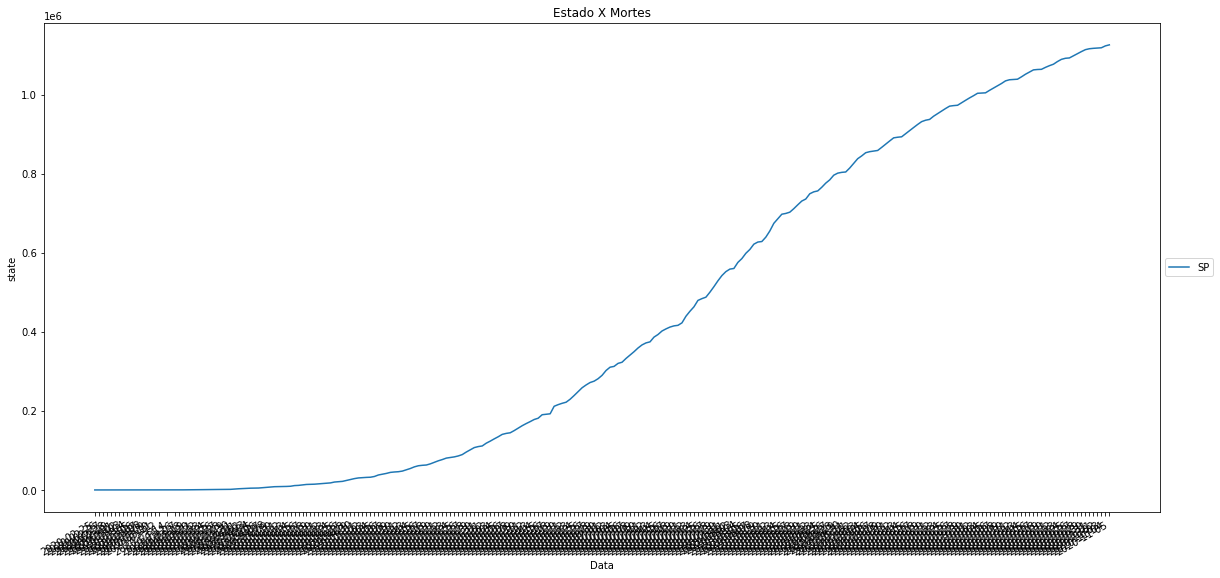

In [53]:

Plot_Pivot(SP,'Data', 'state', 'confirmed',(20, 10),'state',"Estado X Mortes")

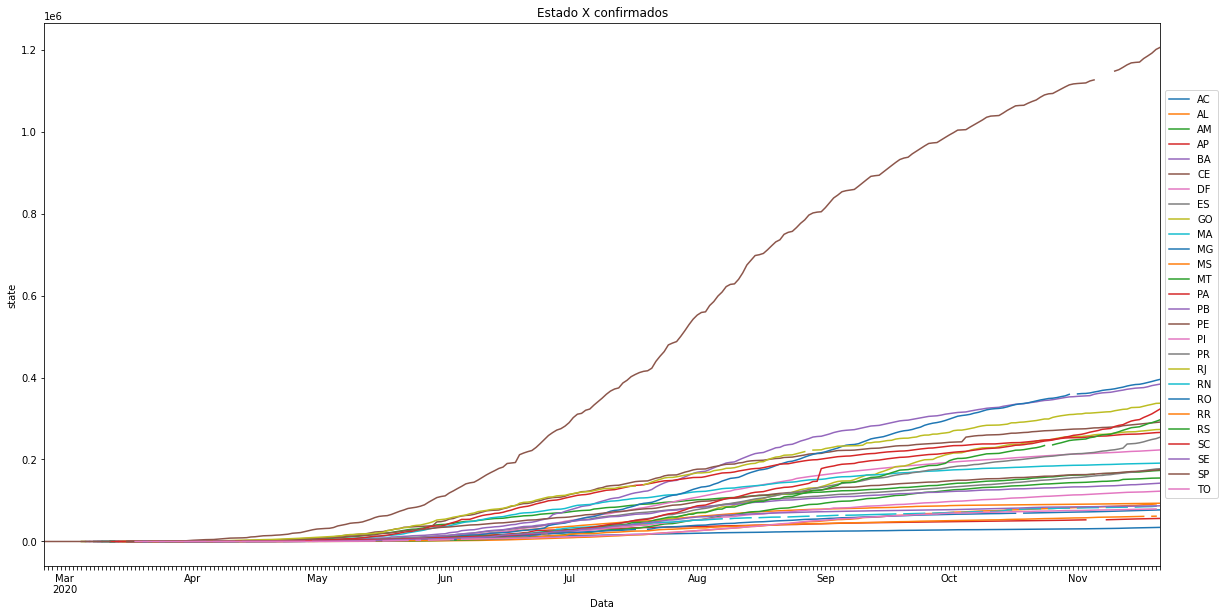

In [60]:
Plot_Pivot(DF_Estados_new,'Data', 'state', 'confirmed',(20, 10),'state',"Estado X confirmados")

In [64]:
SP_n = DF_Estados_new[DF_Estados_new['state']=='SP']

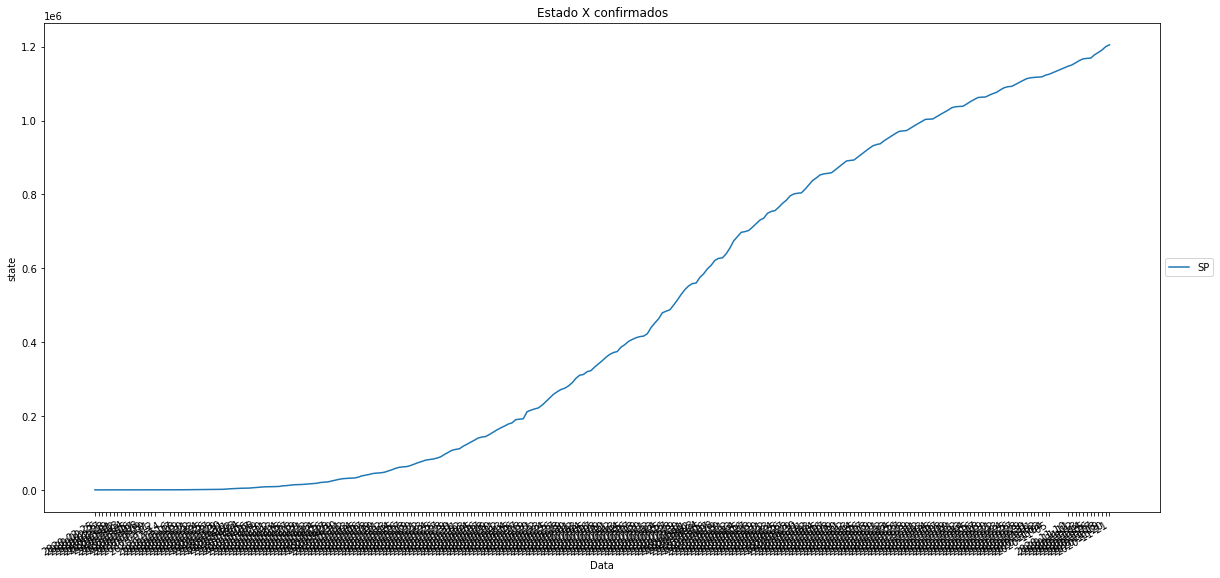

In [65]:
Plot_Pivot(SP_n,'Data', 'state', 'confirmed',(20, 10),'state',"Estado X confirmados")

In [87]:
Brasil_MAP = INFOS_UFS.merge(DF_Estados_new, left_on = 'sigla', right_on = 'state', how = 'left' )

In [94]:
Brasil_MAP = Brasil_MAP.drop(['nome','nomeabrev', 'geometriaaproximada', 'sigla', 'id_produtor', 'id_elementoprodutor', 'cd_insumo_orgao', 'nr_insumo_mes', 'nr_insumo_ano', 'tx_insumo_documento' ], axis=1)

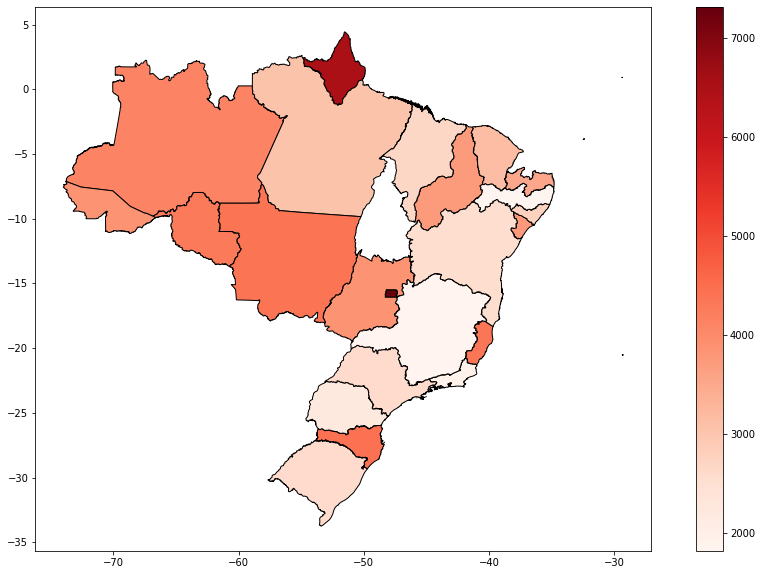

In [113]:
%matplotlib inline

Brasil_MAP[Brasil_MAP['date']=='2020-11-21'].plot(
    column = 'confirmed_per_100k_inhabitants',
    cmap = 'Reds',
    figsize = (16,10),
    legend = True,
    edgecolor = 'black'
)